# Data playground : fake data and deciles

In [ ]:
# Activate multi-output in notebook
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# import numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Generate fake data

In [ ]:
def get_random_data(nb_values: int, nb_zeros: int):
    zeros = np.zeros((nb_zeros,))
    # Using numpy.random.pareto() method
    pareto = np.random.pareto(12.45, nb_values) * 1e7
    return np.concatenate((zeros, pareto), axis=0)

In [ ]:
nb_riche = 10_000
nb_moyen = 40_000
nb_pauvre = 20_000

# nb_riche = 10
# nb_moyen = 40
# nb_pauvre = 20

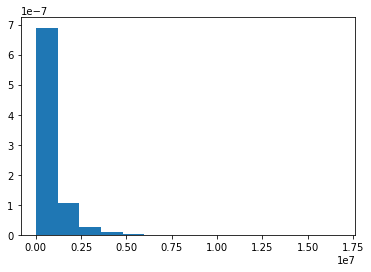

In [ ]:
rfr = get_random_data(nb_riche + nb_moyen, nb_pauvre)
count, bins, ignored = plt.hist(rfr, 14, density=True)
plt.show()

In [ ]:
rfr.shape

(70000,)

In [ ]:
rfr.max()

11175219.534386259

In [ ]:
rk = get_random_data(nb_riche, nb_moyen + nb_pauvre)
df = pd.DataFrame({"rfr": rfr, "rk": rk})

In [ ]:
df

,rfr,rk
0,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00
...,...,...
69995,5.904367e+05,2.629471e+04
69996,9.945227e+03,1.397098e+06
69997,2.281299e+06,1.446328e+02
69998,1.962324e+06,5.892312e+05


In [ ]:
pd.qcut(df["rfr"], q=10, duplicates="drop")

0              (-0.001, 294562.119]
1              (-0.001, 294562.119]
2              (-0.001, 294562.119]
3              (-0.001, 294562.119]
4              (-0.001, 294562.119]
                    ...            
69995      (294562.119, 876949.304]
69996          (-0.001, 294562.119]
69997    (876949.304, 11175219.534]
69998    (876949.304, 11175219.534]
69999          (-0.001, 294562.119]
Name: rfr, Length: 70000, dtype: category
Categories (3, interval[float64]): [(-0.001, 294562.119] < (294562.119, 876949.304] < (876949.304, 11175219.534]]

In [ ]:
nb_deciles = 10
decile_fraction = []
for i in range(nb_deciles):
    print(i)
    decile_fraction.append((1 / nb_deciles) * (i + 1))
decile_fraction

0
1
2
3
4
5
6
7
8
9


[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [ ]:
deciles = df.quantile(decile_fraction)
deciles

,rfr,rk
0.1,0.000000e+00,0.000000e+00
0.2,0.000000e+00,5.530501e+04
0.3,0.000000e+00,1.628189e+05
0.4,0.000000e+00,2.908089e+05
0.5,0.000000e+00,4.419479e+05
0.6,0.000000e+00,6.293141e+05
0.7,0.000000e+00,8.822315e+05
0.8,2.945621e+05,1.248045e+06
0.9,8.769493e+05,1.881363e+06
1.0,1.117522e+07,1.472595e+07


In [ ]:
df.rfr.min()
df.rfr.max()

df.rk.min()
df.rk.max()

0.0

11175219.534386259

0.0

14725948.448334796

In [ ]:
len(df)
df[df["rfr"] == 0].count()

70000

rfr    50000
rk     50000
dtype: int64

In [ ]:
df[df["rk"] < 1.109862e05].count() / len(df)

rfr    0.254557
rk     0.254557
dtype: float64

In [ ]:
deciles

,rfr,rk
0.1,0.000000e+00,0.000000e+00
0.2,0.000000e+00,5.530501e+04
0.3,0.000000e+00,1.628189e+05
0.4,0.000000e+00,2.908089e+05
0.5,0.000000e+00,4.419479e+05
0.6,0.000000e+00,6.293141e+05
0.7,0.000000e+00,8.822315e+05
0.8,2.945621e+05,1.248045e+06
0.9,8.769493e+05,1.881363e+06
1.0,1.117522e+07,1.472595e+07
